# Proyek Analisis Data: [Input Nama Dataset]

## Summary
Data yang kami gunakan yaitu berasal dari 
https://data.worldbank.org/

## Pertanyaan Bisnis

### 1. **Melihat Tren Harga Komoditas dari Waktu ke Waktu**

**Cara menghitungnya:**

* **Plot time series** dari harga (misalnya Close price) berdasarkan tanggal.
* Hitung **rata-rata bergerak (moving average)** untuk menghaluskan fluktuasi jangka pendek.
* Gunakan metode statistik sederhana untuk melihat **tren linier** atau **pola naik/turun**.

**Tujuan:** Menilai apakah harga cenderung naik, turun, atau stagnan dalam periode tertentu.

### 2. **Mencari Korelasi antara Inflasi dan Harga Komoditas**

**Cara menghitungnya:**

* Ambil data inflasi dan harga komoditas pada periode yang sama untuk satu negara.
* Gunakan rumus **korelasi Pearson** untuk menghitung hubungan linier antara dua variabel.
* Jika kamu ingin tahu pengaruh sebab-akibat, kamu bisa pelajari **regresi linier sederhana**.

**Tujuan:** Melihat apakah inflasi tinggi biasanya diikuti oleh kenaikan harga atau tidak.

### 3. **Mengukur Volatilitas Harga di Suatu Negara**

**Cara menghitungnya:**

* Volatilitas diukur dari **simpangan baku (standard deviation)** dari harga dalam periode tertentu.
* Bisa juga menggunakan **rentang harga**: High – Low.
* Lakukan per negara dan bandingkan nilai simpangan bakunya.

**Tujuan:** Negara dengan simpangan baku tertinggi berarti harga komoditasnya paling tidak stabil.

### 4. **Mendeteksi Pola Musiman**

**Cara menghitungnya:**

* Kelompokkan data berdasarkan bulan atau kuartal dari setiap tahun.
* Hitung rata-rata harga per bulan atau kuartal.
* Amati apakah ada bulan-bulan tertentu dengan harga yang konsisten lebih tinggi/rendah.

**Tujuan:** Menemukan siklus yang berulang tiap tahun, misalnya harga naik setiap musim dingin.

### 5. **Menganalisis Dampak Ekonomi Makro terhadap Harga Komoditas**

**Cara menghitungnya:**

* Buat model **regresi linier berganda** dengan inflasi (dan faktor makro lain jika ada) sebagai variabel independen dan harga sebagai variabel dependen.
* Amati koefisien regresi untuk melihat kekuatan dan arah pengaruh inflasi.

**Tujuan:** Mengetahui seberapa besar perubahan inflasi memengaruhi harga.

### 6. **Menilai Stabilitas Harga Jangka Panjang**

**Cara menghitungnya:**

* Hitung **simpangan baku jangka panjang** dari harga komoditas per negara.
* Amati tren umum—negara dengan tren datar dan volatilitas rendah menunjukkan kestabilan.
* Bisa juga lihat jumlah fluktuasi ekstrem dalam periode tertentu.

**Tujuan:** Identifikasi pasar dengan risiko rendah untuk investasi jangka panjang.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

## Data Wrangling

### Gathering Data
Proses memasukkan data
`pd.read_csv()`

In [2]:
data = pd.read_csv('WLD_RTFP_country_2025-04-21.csv')

**Insight:**
- Proses input data menggunakan fungsi `read_csv`

### Assessing Data
Proses menilai kualitas data baik secara manual maupun programatik
`df.info(), df.describe(), df.head(), dll.`

In [3]:
data.head()

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.54,0.55,0.54,0.54,NaN,Afghanistan,AFG,2007-01-01
1,0.54,0.55,0.54,0.54,NaN,Afghanistan,AFG,2007-02-01
2,0.53,0.54,0.53,0.54,NaN,Afghanistan,AFG,2007-03-01
3,0.54,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.57,0.58,0.56,0.58,NaN,Afghanistan,AFG,2007-05-01


In [4]:
data.tail()

,Open,High,Low,Close,Inflation,country,ISO3,date
7518,3.66,3.74,3.57,3.63,19.98,"Yemen, Rep.",YEM,2024-12-01
7519,3.65,3.72,3.57,3.64,20.46,"Yemen, Rep.",YEM,2025-01-01
7520,3.68,3.75,3.61,3.74,25.56,"Yemen, Rep.",YEM,2025-02-01
7521,3.81,3.88,3.74,3.79,27.12,"Yemen, Rep.",YEM,2025-03-01
7522,3.82,3.92,3.75,3.92,31.33,"Yemen, Rep.",YEM,2025-04-01


In [5]:
data.shape

(7523, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7523 entries, 0 to 7522
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7440 non-null   float64
 1   High       7440 non-null   float64
 2   Low        7440 non-null   float64
 3   Close      7440 non-null   float64
 4   Inflation  7008 non-null   float64
 5   country    7523 non-null   object 
 6   ISO3       7523 non-null   object 
 7   date       7523 non-null   object 
dtypes: float64(5), object(3)
memory usage: 470.3+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,7440.0,1.985591,8.903713,0.01,0.79,0.98,1.17,222.26
High,7440.0,2.065571,9.571544,0.01,0.81,1.00,1.19,231.65
Low,7440.0,1.908554,8.250888,0.01,0.78,0.97,1.15,209.19
Close,7440.0,1.981874,8.835651,0.01,0.79,0.98,1.17,211.00
Inflation,7008.0,13.490819,35.984733,-59.10,-0.82,5.01,14.93,518.73


In [8]:
print(data.isnull().sum())

print(f'\n Total null {data.isnull().sum().sum()}')

Open          83
High          83
Low           83
Close         83
Inflation    515
country        0
ISO3           0
date           0
dtype: int64

 Total null 847


In [9]:
data.duplicated().sum()

0

In [10]:
null_data = data[data.isnull().any(axis=1)]
null_data

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.54,0.55,0.54,0.54,NaN,Afghanistan,AFG,2007-01-01
1,0.54,0.55,0.54,0.54,NaN,Afghanistan,AFG,2007-02-01
2,0.53,0.54,0.53,0.54,NaN,Afghanistan,AFG,2007-03-01
3,0.54,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.57,0.58,0.56,0.58,NaN,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
7334,0.50,0.50,0.49,0.49,NaN,"Yemen, Rep.",YEM,2009-08-01
7335,0.50,0.50,0.49,0.50,NaN,"Yemen, Rep.",YEM,2009-09-01
7336,0.51,0.52,0.50,0.51,NaN,"Yemen, Rep.",YEM,2009-10-01
7337,0.52,0.53,0.51,0.52,NaN,"Yemen, Rep.",YEM,2009-11-01


In [11]:
list_country = list(data['country'].unique())
list_ISO3 = list(data['ISO3'].unique())

print('Nama Negara : Kode Negara')
print('------------------')
for country, iso in zip(list_country, list_ISO3):
    print(f'{country} : {iso}')
    print('------------------')

Nama Negara : Kode Negara
------------------
Afghanistan : AFG
------------------
Armenia : ARM
------------------
Burundi : BDI
------------------
Burkina Faso : BFA
------------------
Bangladesh : BGD
------------------
Central African Republic : CAF
------------------
Cameroon : CMR
------------------
Congo, Dem. Rep. : COD
------------------
Congo, Rep. : COG
------------------
Guinea : GIN
------------------
Gambia, The : GMB
------------------
Guinea-Bissau : GNB
------------------
Haiti : HTI
------------------
Indonesia : IDN
------------------
Iraq : IRQ
------------------
Kenya : KEN
------------------
Lao PDR : LAO
------------------
Lebanon : LBN
------------------
Liberia : LBR
------------------
Libya : LBY
------------------
Sri Lanka : LKA
------------------
Mali : MLI
------------------
Myanmar : MMR
------------------
Mozambique : MOZ
------------------
Mauritania : MRT
------------------
Malawi : MWI
------------------
Niger : NER
------------------
Nigeria : NGA
---

**Insight:**
- Terdapat data sebanyak `7523 Row` dan `8 Column`
- Masing - masingnya terdapat `5 data Float` dan `3 object`
- Tidak ada data duplikat
- Ada kolom data yang kosong, `Open, High, Low, Close, Inflation` (Semua tipe float) dengan `total 847`

### Cleaning Data
Proses memperbaiki data: `.dropna(), .fillna(), astype(), .drop_duplicates()`

##### dropna

In [12]:
data.dropna(inplace=True)

print(data.isnull().sum().sum())
print(data.shape)

0
(7008, 8)


##### fillna with mean

In [13]:
# data.fillna(data.mean(), inplace=True)
# data.isnull().sum().sum()

In [14]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [15]:
data.head()

,Open,High,Low,Close,Inflation,country,ISO3,date,year,month,day
12,0.74,0.77,0.73,0.77,41.84,Afghanistan,AFG,2008-01-01,2008,1,1
13,0.80,0.81,0.79,0.79,47.41,Afghanistan,AFG,2008-02-01,2008,2,1
14,0.81,0.85,0.80,0.85,58.24,Afghanistan,AFG,2008-03-01,2008,3,1
15,0.89,0.95,0.87,0.95,71.58,Afghanistan,AFG,2008-04-01,2008,4,1
16,0.99,1.05,0.98,1.05,80.71,Afghanistan,AFG,2008-05-01,2008,5,1


In [16]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Open,7008.0,2.069648,0.01,0.83,0.99,1.19,222.26,9.16722
High,7008.0,2.153901,0.01,0.85,1.01,1.21,231.65,9.855157
Low,7008.0,1.988477,0.01,0.82,0.98,1.17,209.19,8.494725
Close,7008.0,2.065648,0.01,0.84,0.99,1.19,211.0,9.097084
Inflation,7008.0,13.490819,-59.1,-0.82,5.01,14.93,518.73,35.984733
date,7008,2017-01-13 08:29:10.684931328,2008-01-01 00:00:00,2013-01-01 00:00:00,2017-03-01 00:00:00,2021-04-01 00:00:00,2025-04-01 00:00:00,NaN
year,7008.0,2016.58476,2008.0,2013.0,2017.0,2021.0,2025.0,4.874501
month,7008.0,6.423373,1.0,3.0,6.0,9.0,12.0,3.466714
day,7008.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 12 to 7522
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       7008 non-null   float64       
 1   High       7008 non-null   float64       
 2   Low        7008 non-null   float64       
 3   Close      7008 non-null   float64       
 4   Inflation  7008 non-null   float64       
 5   country    7008 non-null   object        
 6   ISO3       7008 non-null   object        
 7   date       7008 non-null   datetime64[ns]
 8   year       7008 non-null   int32         
 9   month      7008 non-null   int32         
 10  day        7008 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), object(2)
memory usage: 574.9+ KB


**Insight:**
- Data Sudah dibersihkan dari data yang kosong dan duplikat
- Tanggal sudah diganti formatnya jadi datetime
- Penambahan column `year, month, dan day` untuk mempermudah

## Exploratory Data Analysis (EDA)

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_3552\77221574.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='date', y='Close', palette='mako')


<Axes: xlabel='date', ylabel='Close'>

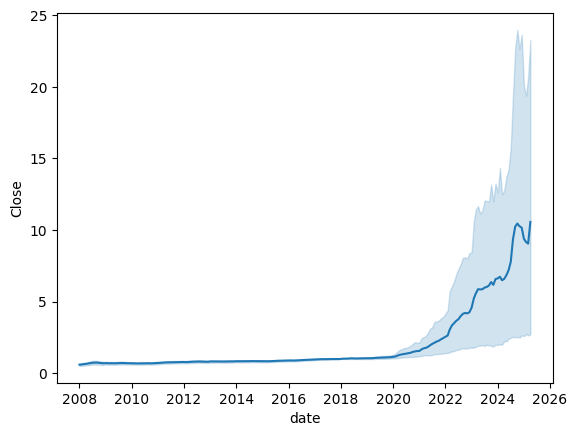

In [18]:
# sns.lineplot(data = None, x = None, y = None, hue = None, size = None, style = None, units = None, weights = None, palette = None)
sns.lineplot(data=data, x='date', y='Close', palette='mako')

##### Time Series

<Axes: xlabel='date', ylabel='Close'>

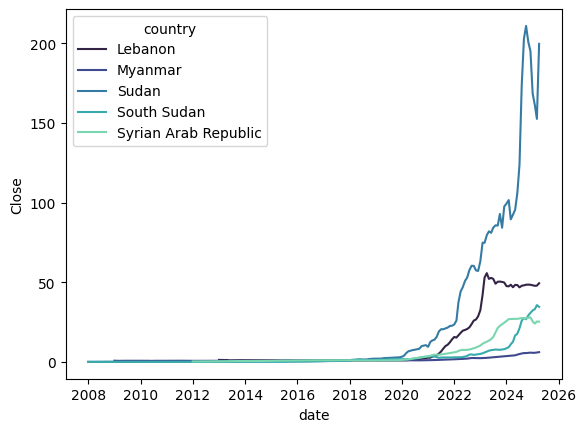

In [19]:
# sort 5 teratas negara high value
top_5_country = list(data.groupby('country')['Close'].max().sort_values(ascending=False).head(5).index)

# plot top 5 negara
sns.lineplot(data=data[data['country'].isin(top_5_country)], x='date', y='Close', hue='country', palette='mako')

Cara menghitungnya:
Secara konsep, kamu mengambil rata-rata dari n data terakhir dalam urutan waktu.

Contoh:
Jika kamu punya data harga harian:

Hari 1: 100
Hari 2: 105
Hari 3: 110
Hari 4: 120
Untuk Moving Average 3-hari di Hari 4:

(105 + 110 + 120) / 3 = 111.67

##### Moving Average by YoY

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_3552\2173594092.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[data['year'].isin(rata_rata_close)], x='year', y='Close', palette='mako')


<Axes: xlabel='year', ylabel='Close'>

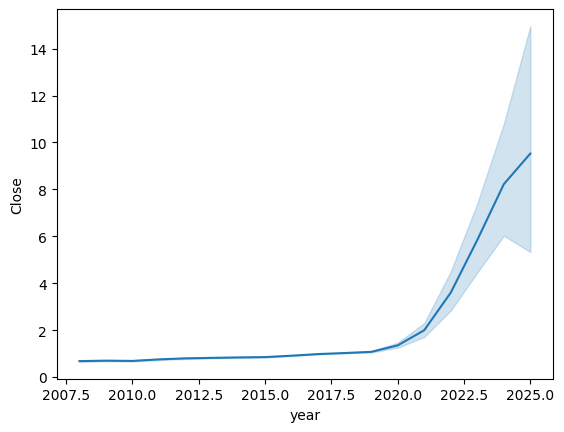

In [20]:
rata_rata_close = list(data.groupby('year')['Close'].mean().index)

sns.lineplot(data=data[data['year'].isin(rata_rata_close)], x='year', y='Close', palette='mako')

##### Moving Average MoM by Year

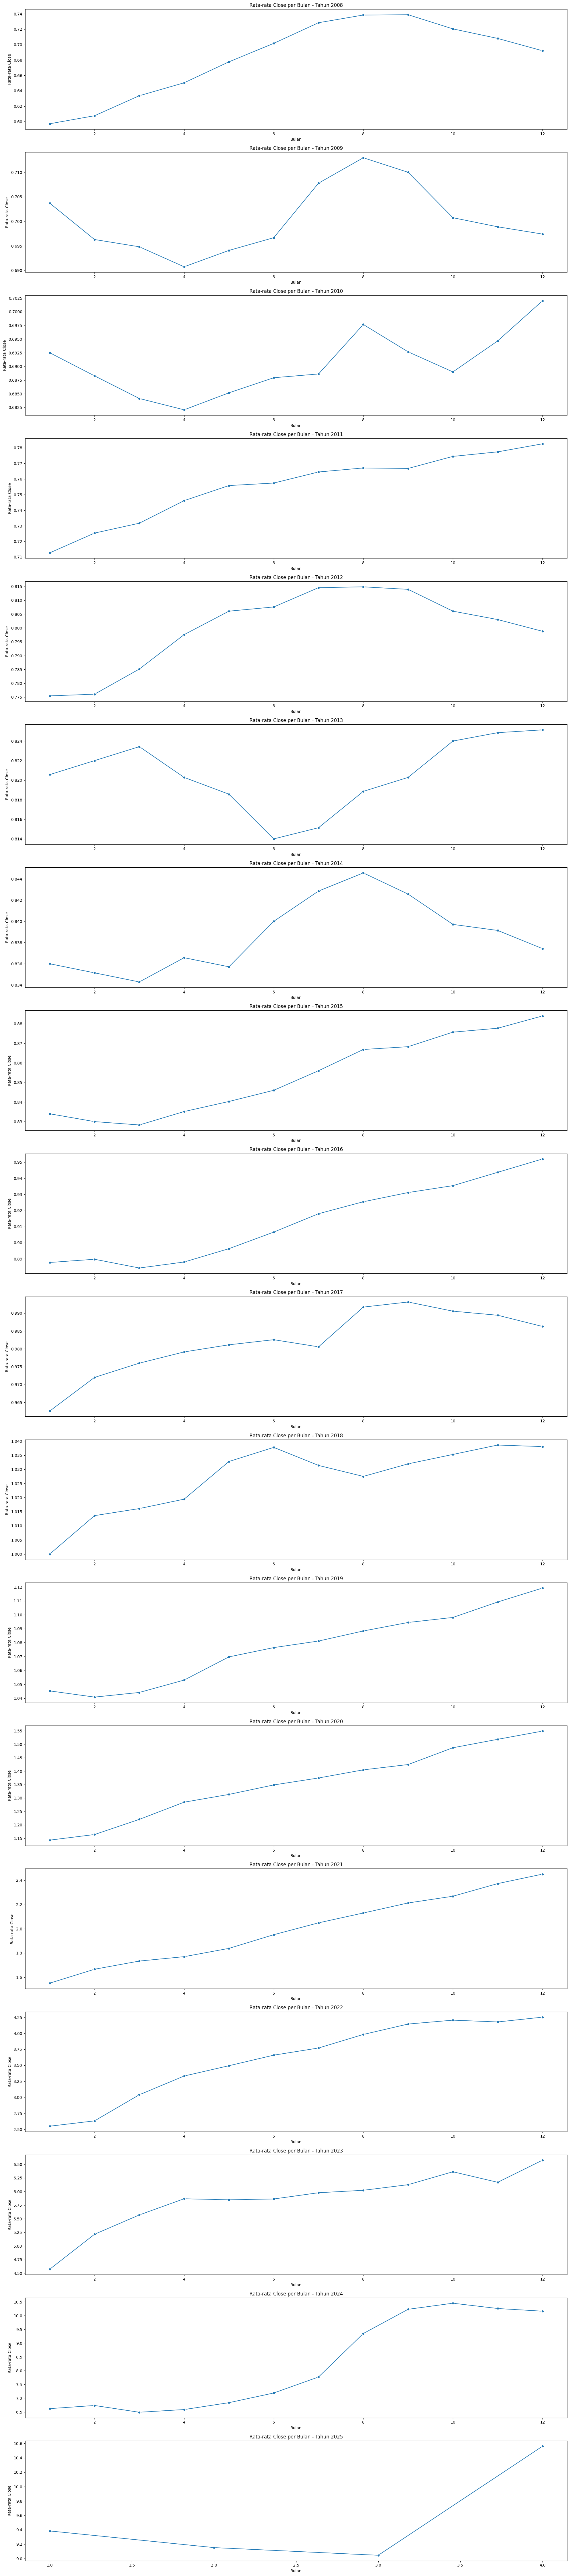

In [21]:
list_year = list(data['year'].unique())
num_years = len(list_year)

# Tentukan ukuran plot dan jumlah baris/kolom subplot
plt.figure(figsize=(20, 5 * num_years))

for idx, i in enumerate(list_year, 1):
    # Filter data untuk tahun tertentu
    data_tahun = data[data['year'] == i]

    # Hitung rata-rata close per bulan
    rata_rata_close = data_tahun.groupby('month')['Close'].mean().reset_index()

    # Buat subplot
    plt.subplot(num_years, 1, idx)
    sns.lineplot(data=rata_rata_close, x='month', y='Close', marker='o')
    plt.title(f'Rata-rata Close per Bulan - Tahun {i}')
    plt.xlabel('Bulan')
    plt.ylabel('Rata-rata Close')

plt.tight_layout()
plt.show()


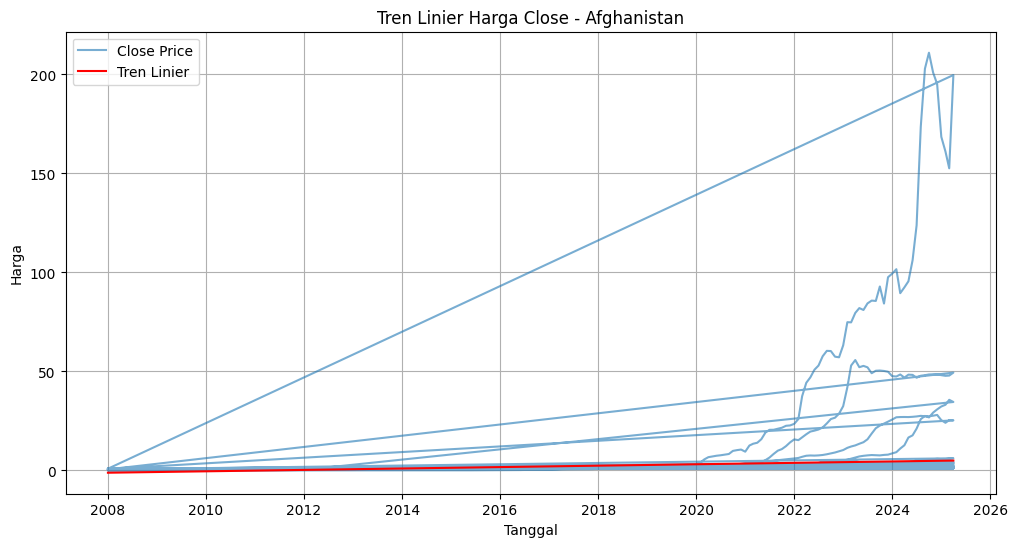

Koefisien tren (slope): 0.000975


In [22]:
# Ubah tanggal ke bentuk numerik agar bisa diregresi
data['date_ordinal'] = data['date'].map(pd.Timestamp.toordinal)

# Model regresi linier
X = data[['date_ordinal']]
y = data['Close']
model = LinearRegression()
model.fit(X, y)

# Prediksi tren
data['trend'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['Close'], label='Close Price', alpha=0.6)
plt.plot(data['date'], data['trend'], label='Tren Linier', color='red')
plt.title('Tren Linier Harga Close - Afghanistan')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

# (Opsional) Cetak slope tren
print(f"Koefisien tren (slope): {model.coef_[0]:.6f}")


Korelasi Pearson antara Inflasi dan Harga Close: 0.195
P-Value: 0.0049


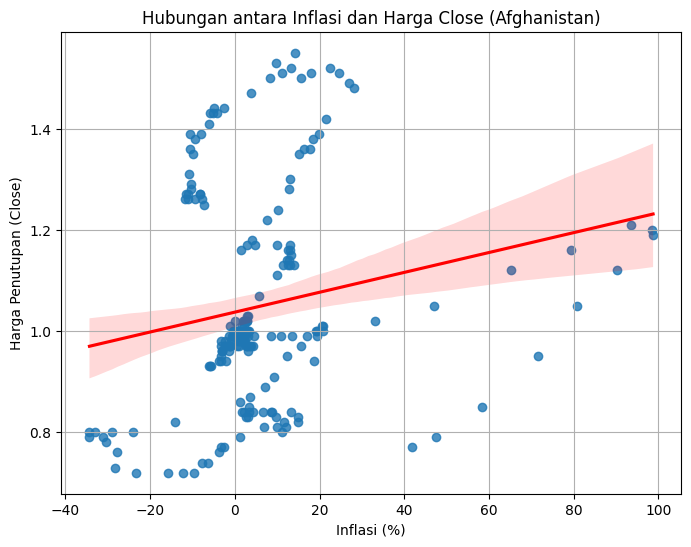

In [23]:
df_afg = data[data['country'] == 'Afghanistan'].copy()

corr, p_value = pearsonr(df_afg['Inflation'], df_afg['Close'])

print(f"Korelasi Pearson antara Inflasi dan Harga Close: {corr:.3f}")
print(f"P-Value: {p_value:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(data=df_afg, x='Inflation', y='Close', line_kws={'color': 'red'})
plt.title('Hubungan antara Inflasi dan Harga Close (Afghanistan)')
plt.xlabel('Inflasi (%)')
plt.ylabel('Harga Penutupan (Close)')
plt.grid(True)
plt.show()

                 country  volatility_std  avg_range
33                 Sudan       44.541310   3.058894
18               Lebanon       18.622220   1.063919
34  Syrian Arab Republic        8.441949   0.272063
31           South Sudan        6.678606   0.339712
25               Myanmar        1.254226   0.070867
13                 Haiti        1.211486   0.061250
32             Sri Lanka        1.076687   0.065749
35           Yemen, Rep.        0.961870   0.068315
21                Malawi        0.772363   0.048365
4                Burundi        0.587023   0.059519


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_3552\608229826.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_volatility, y='country', x='volatility_std', palette='Reds_r')


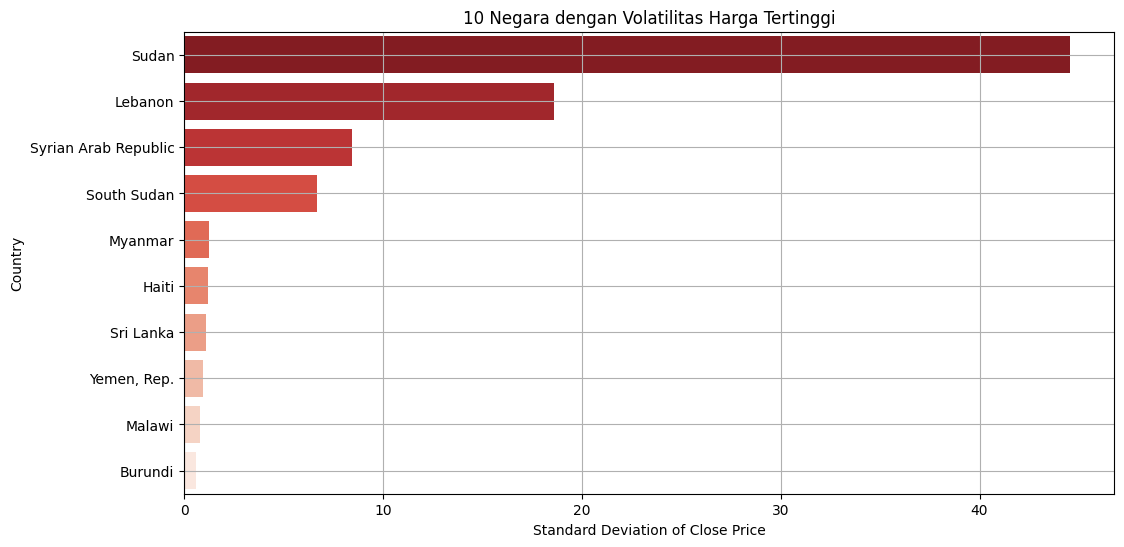

In [24]:
# Hitung volatilitas berdasarkan simpangan baku dari Close price per negara
volatility_std = data.groupby('country')['Close'].std().reset_index()
volatility_std.columns = ['country', 'volatility_std']

# Hitung rentang harga rata-rata (High - Low)
data['range'] = data['High'] - data['Low']
volatility_range = data.groupby('country')['range'].mean().reset_index()
volatility_range.columns = ['country', 'avg_range']

# Gabungkan dua metrik
volatility_summary = pd.merge(volatility_std, volatility_range, on='country')

# Tampilkan 10 negara dengan volatilitas tertinggi berdasarkan std
top_volatility = volatility_summary.sort_values(by='volatility_std', ascending=False).head(10)
print(top_volatility)


plt.figure(figsize=(12, 6))
sns.barplot(data=top_volatility, y='country', x='volatility_std', palette='Reds_r')
plt.title('10 Negara dengan Volatilitas Harga Tertinggi')
plt.xlabel('Standard Deviation of Close Price')
plt.ylabel('Country')
plt.grid(True)
plt.show()


    month     Close
0       1  2.071650
1       2  2.115025
2       3  2.148534
3       4  2.272241
4       5  1.800979
5       6  1.847045
6       7  1.909493
7       8  2.033386
8       9  2.112478
9      10  2.152077
10     11  2.135759
11     12  2.167539


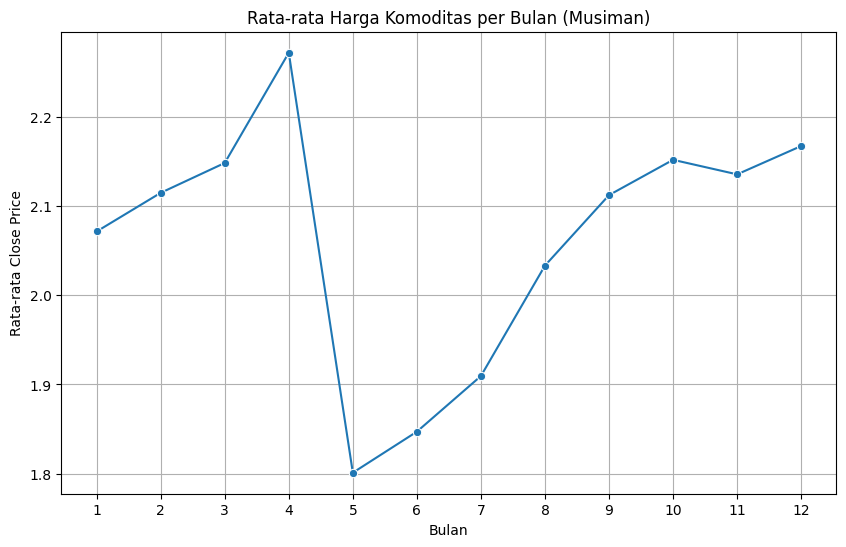

In [25]:
# Ekstrak bulan dari tanggal
data['month'] = data['date'].dt.month

# Rata-rata harga per bulan (agregat semua negara)
monthly_avg = data.groupby('month')['Close'].mean().reset_index()

# Tampilkan
print(monthly_avg)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='month', y='Close', marker='o')
plt.title('Rata-rata Harga Komoditas per Bulan (Musiman)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Close Price')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


Intercept: 1.0969
Koefisien Inflasi terhadap Harga: 0.0718


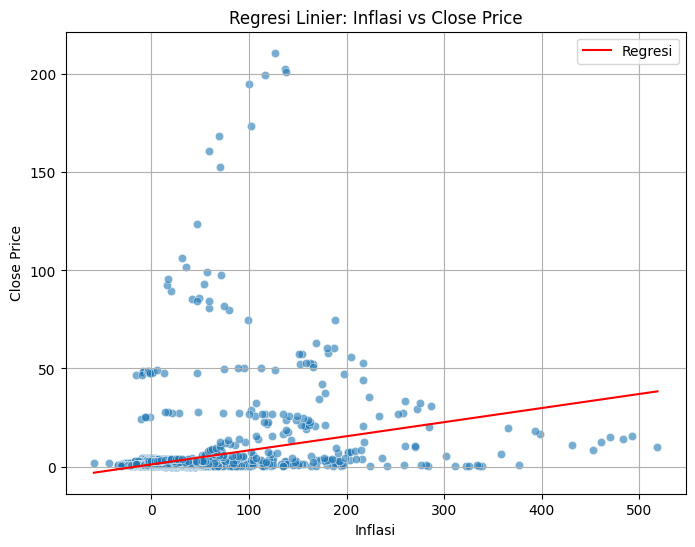

In [26]:
# Bersihkan data: hapus yang kosong
df_reg = data.dropna(subset=['Inflation', 'Close'])

# Fit regresi linier
X = df_reg[['Inflation']]
y = df_reg['Close']

model = LinearRegression()
model.fit(X, y)

# Tampilkan hasil
print(f"Intercept: {model.intercept_:.4f}")
print(f"Koefisien Inflasi terhadap Harga: {model.coef_[0]:.4f}")

# Prediksi dan plot
df_reg['predicted_close'] = model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_reg['Inflation'], y=df_reg['Close'], alpha=0.6)
sns.lineplot(x=df_reg['Inflation'], y=df_reg['predicted_close'], color='red', label='Regresi')
plt.title('Regresi Linier: Inflasi vs Close Price')
plt.xlabel('Inflasi')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

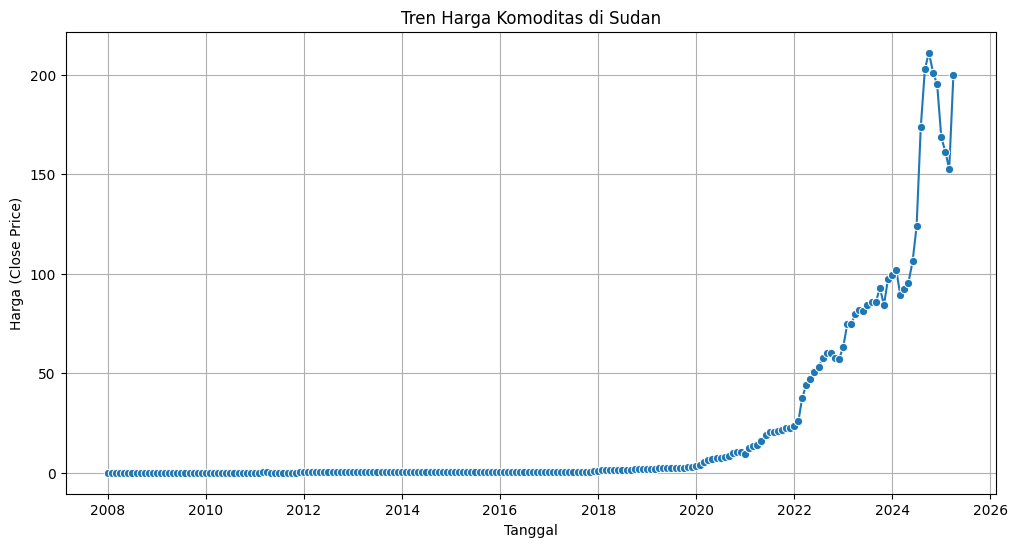

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_3552\65536292.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['MA_3'] = df_country['Close'].rolling(window=3).mean()


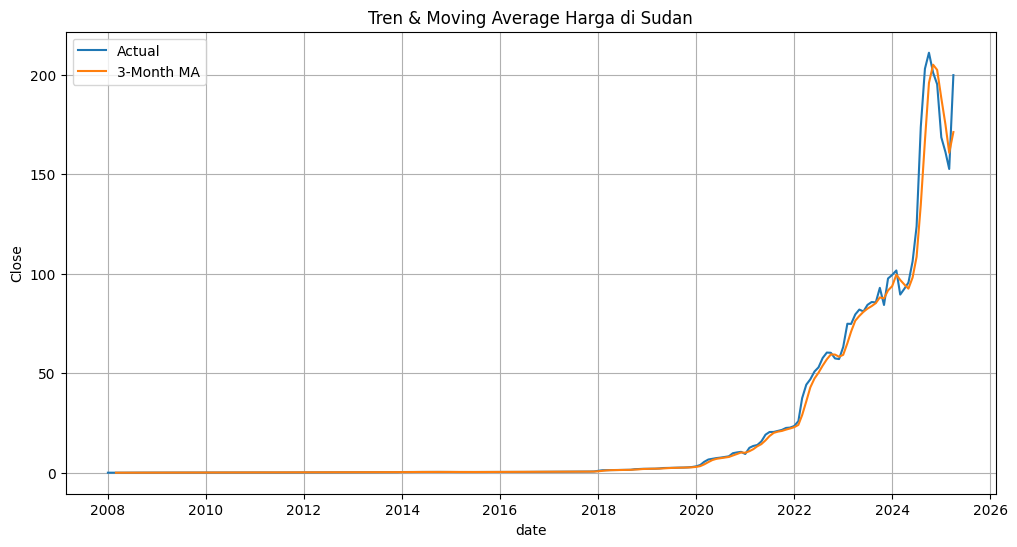

In [27]:
country = "Sudan"
df_country = data[data['country'] == country]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_country, x='date', y='Close', marker='o')
plt.title(f'Tren Harga Komoditas di {country}')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Close Price)')
plt.grid(True)
plt.show()

df_country['MA_3'] = df_country['Close'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_country, x='date', y='Close', label='Actual')
sns.lineplot(data=df_country, x='date', y='MA_3', label='3-Month MA')
plt.title(f'Tren & Moving Average Harga di {country}')
plt.legend()
plt.grid(True)
plt.show()


### Pertanyaan 2:

Korelasi Pearson Inflasi vs Harga di Sudan: 0.2259


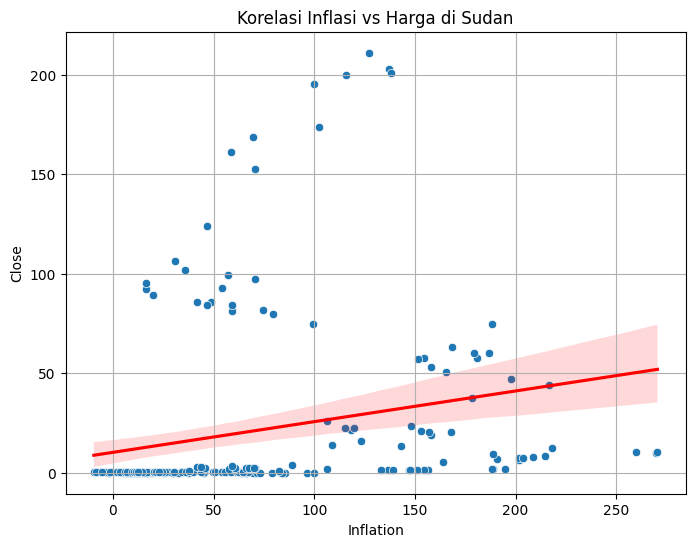

In [28]:
df_corr = df_country.dropna(subset=['Inflation', 'Close'])

correlation = df_corr['Inflation'].corr(df_corr['Close'])
print(f"Korelasi Pearson Inflasi vs Harga di {country}: {correlation:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='Inflation', y='Close')
sns.regplot(data=df_corr, x='Inflation', y='Close', scatter=False, color='red')
plt.title(f'Korelasi Inflasi vs Harga di {country}')
plt.grid(True)
plt.show()

### Pertanyaan 3:

                 country  volatility_std  avg_range
33                 Sudan       44.541310   3.058894
18               Lebanon       18.622220   1.063919
34  Syrian Arab Republic        8.441949   0.272063
31           South Sudan        6.678606   0.339712
25               Myanmar        1.254226   0.070867
13                 Haiti        1.211486   0.061250
32             Sri Lanka        1.076687   0.065749
35           Yemen, Rep.        0.961870   0.068315
21                Malawi        0.772363   0.048365
4                Burundi        0.587023   0.059519


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_3552\271257137.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_volatility, y='country', x='volatility_std', palette='Reds_r')


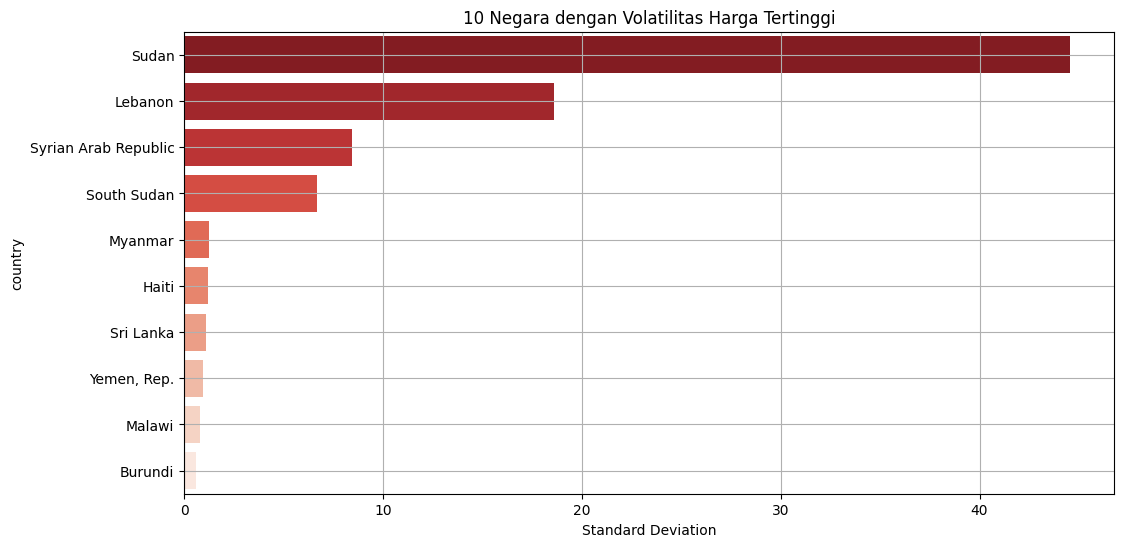

In [29]:
# Volatilitas (std dev)
volatility_std = data.groupby('country')['Close'].std().reset_index()
volatility_std.columns = ['country', 'volatility_std']

# Rata-rata rentang harga
volatility_range = data.groupby('country')['range'].mean().reset_index()
volatility_range.columns = ['country', 'avg_range']

# Gabung
volatility_summary = pd.merge(volatility_std, volatility_range, on='country')

# Top 10 negara paling volatil
top_volatility = volatility_summary.sort_values(by='volatility_std', ascending=False).head(10)
print(top_volatility)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_volatility, y='country', x='volatility_std', palette='Reds_r')
plt.title('10 Negara dengan Volatilitas Harga Tertinggi')
plt.xlabel('Standard Deviation')
plt.grid(True)
plt.show()


### Pertanyaan 4:

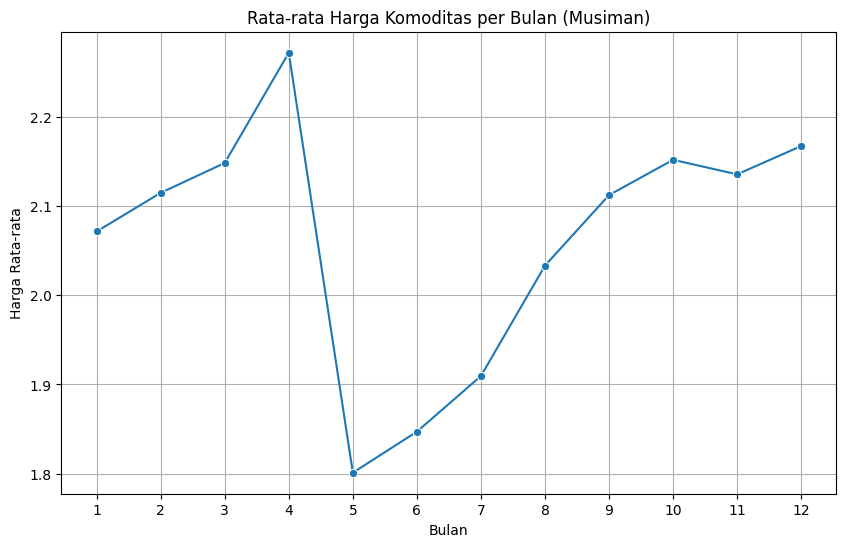

In [30]:
monthly_avg = data.groupby('month')['Close'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='month', y='Close', marker='o')
plt.title('Rata-rata Harga Komoditas per Bulan (Musiman)')
plt.xlabel('Bulan')
plt.ylabel('Harga Rata-rata')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


### Pertanyaan 5:

Intercept: 1.0969
Koefisien Inflasi terhadap Harga: 0.0718


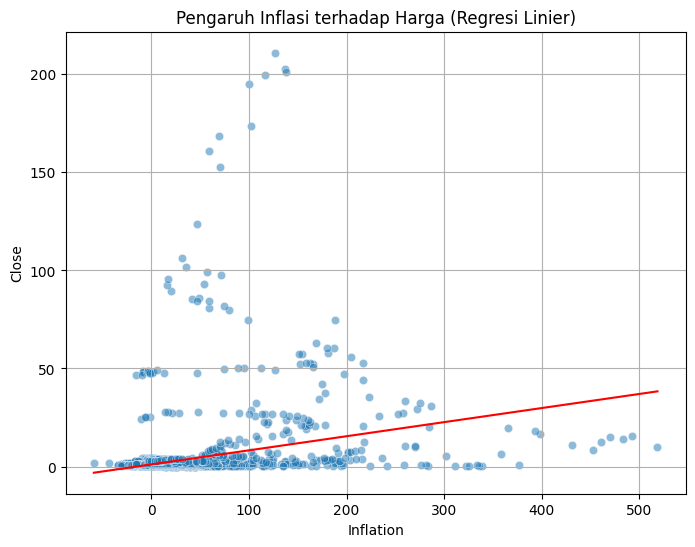

In [31]:
X = data[['Inflation']]
y = data['Close']

model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.4f}")
print(f"Koefisien Inflasi terhadap Harga: {model.coef_[0]:.4f}")

# Visualisasi regresi
data['predicted_close'] = model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Inflation'], y=data['Close'], alpha=0.5)
sns.lineplot(x=data['Inflation'], y=data['predicted_close'], color='red')
plt.title('Pengaruh Inflasi terhadap Harga (Regresi Linier)')
plt.grid(True)
plt.show()


### Pertanyaan 6:

          country  volatility_std
9     Congo, Rep.        0.061873
1         Armenia        0.079095
15           Iraq        0.093704
12  Guinea-Bissau        0.108703
7            Chad        0.132231
5        Cameroon        0.138291
14      Indonesia        0.138872
26          Niger        0.174252
22           Mali        0.180422
20          Libya        0.180831


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_3552\2986419922.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_stable, y='country', x='volatility_std', palette='Greens')


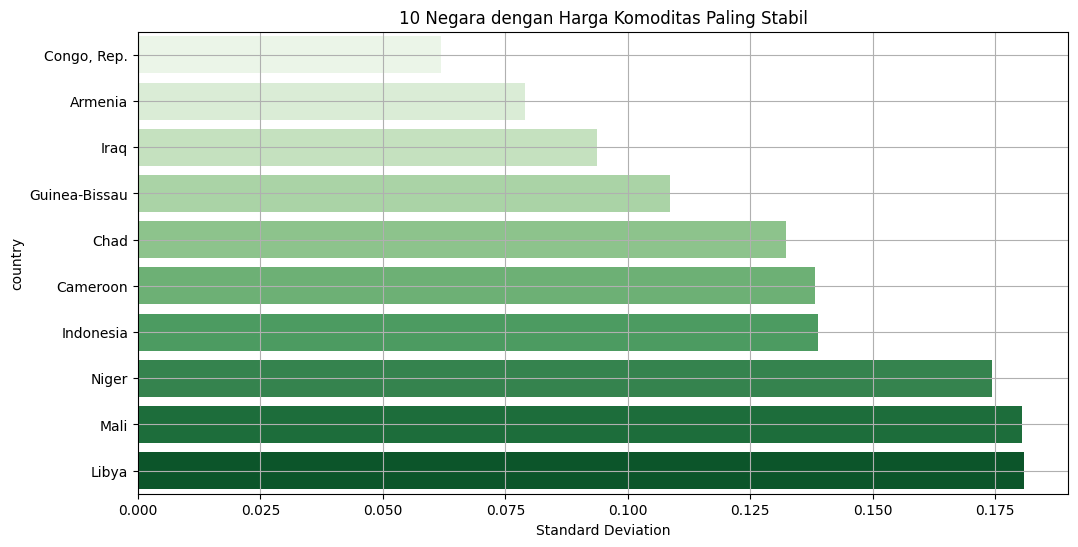

In [32]:
most_stable = volatility_std.sort_values(by='volatility_std').head(10)
print(most_stable)

plt.figure(figsize=(12, 6))
sns.barplot(data=most_stable, y='country', x='volatility_std', palette='Greens')
plt.title('10 Negara dengan Harga Komoditas Paling Stabil')
plt.xlabel('Standard Deviation')
plt.grid(True)
plt.show()


**Insight:**
- xxx
- xxx

In [ ]:
data.to_csv('clean_data.csv')

## Analisis Lanjutan (Opsional)

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [363]:
data.columns.to_list()

['Open',
 'High',
 'Low',
 'Close',
 'Inflation',
 'country',
 'ISO3',
 'date',
 'year',
 'month',
 'day',
 'date_ordinal',
 'trend',
 'range',
 'predicted_close']

In [364]:
data.head()

,Open,High,Low,Close,Inflation,country,ISO3,date,year,month,day,date_ordinal,trend,range,predicted_close
12,0.74,0.77,0.73,0.77,41.84,Afghanistan,AFG,2008-01-01,2008,1,1,733042,-1.150859,0.04,4.101448
13,0.80,0.81,0.79,0.79,47.41,Afghanistan,AFG,2008-02-01,2008,2,1,733073,-1.120647,0.02,4.501438
14,0.81,0.85,0.80,0.85,58.24,Afghanistan,AFG,2008-03-01,2008,3,1,733102,-1.092384,0.05,5.279158
15,0.89,0.95,0.87,0.95,71.58,Afghanistan,AFG,2008-04-01,2008,4,1,733133,-1.062171,0.08,6.237124
16,0.99,1.05,0.98,1.05,80.71,Afghanistan,AFG,2008-05-01,2008,5,1,733163,-1.032933,0.07,6.892764


In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 12 to 7522
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Open             7008 non-null   float64       
 1   High             7008 non-null   float64       
 2   Low              7008 non-null   float64       
 3   Close            7008 non-null   float64       
 4   Inflation        7008 non-null   float64       
 5   country          7008 non-null   object        
 6   ISO3             7008 non-null   object        
 7   date             7008 non-null   datetime64[ns]
 8   year             7008 non-null   int32         
 9   month            7008 non-null   int32         
 10  day              7008 non-null   int32         
 11  date_ordinal     7008 non-null   int64         
 12  trend            7008 non-null   float64       
 13  range            7008 non-null   float64       
 14  predicted_close  7008 non-null   float64    

In [366]:
unique_codes = data['ISO3'].unique()
iso3_mapping = {}

index = 1
for code in unique_codes:
    iso3_mapping[code] = index
    index += 1

# Terapkan mapping ke kolom baru
data['ISO3_encoded'] = data['ISO3'].map(iso3_mapping)

# Pilih fitur dan target
X = data[['ISO3_encoded', 'year', 'month', 'day']]
y = data['Close']

# Split train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek hasil
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Tampilkan contoh data
print(X_train.head())

Train shape: (5606, 4)
Test shape: (1402, 4)
      ISO3_encoded  year  month  day
1888             9  2022      9    1
3355            16  2022      8    1
2047            10  2018      8    1
5026            25  2012     12    1
411              2  2023     12    1


In [367]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [368]:
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR(),
    'Neural Network': MLPRegressor(max_iter=1000),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [369]:
high_score = 0
high_model = None

for name, model in models.items():
    print(f"Model: {name}")
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    print(f"R^2 Score: {score:.4f}\n")
    
    if score > high_score:
        high_score = score
        high_model = model
        
print(f'\nModel with highest R^2 Score: {high_model}')


Model: Linear Regression
R^2 Score: 0.0457

Model: K-Nearest Neighbors
R^2 Score: 0.0774

Model: Decision Tree
R^2 Score: 0.9772

Model: Support Vector Regression
R^2 Score: 0.0054

Model: Neural Network
R^2 Score: 0.1199

Model: Random Forest
R^2 Score: 0.9940

Model: Gradient Boosting
R^2 Score: 0.9536


Model with highest R^2 Score: RandomForestRegressor()


In [370]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

In [371]:
import joblib
import os

nama_model = 'inflation_rate_model.pkl'
joblib.dump(model, nama_model)

print(f'Model sudah tersimpan di direktori {os.path.abspath(nama_model)}')


Model sudah tersimpan di direktori c:\Users\ThinkPad\Documents\coding_data\VScode_data\PYTHON\Data_Science\Inflation_rate_country\inflation_rate_model.pkl


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2